# Data Science Fundamentals | Prof: Antonio Raimundo | Final Project | Lisbon Houses price prediction | METI 2022/2023

Group Members:

Rafael Duarte - 104196 |
Ricardo Lopes - 103284

# 1. Introduction

The present academical work has the objective to analyse and explore a specific data set wich contains information about a few houses around Lisbon District. Talking more about the data set, it was found on one of the advised repositories, kaggle, updated publicly by Carlos Garces Rodrigues, from whom we thank the share of this data set, and it has a license from GNU Lesses Genereal Public Licenses, that gives the permission to everyone, to copy and distribute verbatim copies of this license document, but changing it is not allowed. The data (https://www.kaggle.com/datasets/cgrodrigues/lisbon-house-prices) set contains record of 246 houses, in Lisbon, with the following attributes:

Id: is a unique identifying number assigned to each house.
Condition: The house condition (i.e., New, Used, As New, For Refurbishment).
PropertyType: Property type (i.e., Home, Single habitation)
PropertySubType: Property Sub Type (i.e., Apartment, duplex, etc.)
Bedrooms: Number of Bedrooms
Bathrooms: Number of Bathrooms
AreaNet: Net area of the house
AreaGross: Gross area of the house
Parking: Number of parking places
Latitude: Geographical Latitude
Longitude: Geographical Longitude
Country: Country where the house is located
District: District where the house is located
Municipality: Municipality where the house is located
Parish: Parish where the house is located
Price Sq. M.: Price per m² in the location of the house
Price: This is our training variable and target. It is the home price.
 
###  1.1 Problem Definition
 
The task in this notebook is to create a model that can predict the house prices based on their caracteristics.
 
###  1.2 Problem Solution
 To solve this problem, we thought of a solution that involves creating a supervised learning model with the correlations between some caracteristics of the recorded houses, like the parish, area net, condition, property sub type, bedrooms, bathrooms, etc. To do so, we use random forest regression alghoritm from the scikit learn python library.
 


### 1.3 Getting Started

First and formost we imported the necessary libraries.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import folium

This lines of code have the objective to see the directory of were the data set is located

In [60]:
! ls -lrt

total 932
-rw-r--r-- 1 rafael rafael  25879 dez  2  2020  lisbon-houses.csv
-rw-r--r-- 1 rafael rafael    337 nov  1 18:29  README.md
-rw-r--r-- 1 rafael rafael     41 nov 24 21:12  token.txt
-rw-r--r-- 1 rafael rafael 915156 dez  4 20:36 'Project - Lisbon House Prices.ipynb'


pd.read to read the data set and create a new pandas dataframe

In [61]:
df_raw= pd.read_csv('lisbon-houses.csv')

dtypes show us all the attributes types that are present on the data set. These are the columns in the dataframe.

In [62]:
df_raw.dtypes

Id                   int64
Condition           object
PropertyType        object
PropertySubType     object
Bedrooms             int64
Bathrooms            int64
AreaNet              int64
AreaGross            int64
Parking              int64
Latitude           float64
Longitude          float64
Country             object
District            object
Municipality        object
Parish              object
Price M2             int64
Price                int64
dtype: object

 Then we converted the objects to strings.

In [63]:
df = df_raw.convert_dtypes()
df.dtypes

Id                   Int64
Condition           string
PropertyType        string
PropertySubType     string
Bedrooms             Int64
Bathrooms            Int64
AreaNet              Int64
AreaGross            Int64
Parking              Int64
Latitude           Float64
Longitude          Float64
Country             string
District            string
Municipality        string
Parish              string
Price M2             Int64
Price                Int64
dtype: object

Here we indicate how many columns are numerical and how many columns ate categorical.

In [64]:
numerical_feats = df.dtypes[df.dtypes != "string"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "string"].index
print("Number of Categorical features: ", len(categorical_feats))



Number of Numerical features:  10
Number of Categorical features:  7


df prints the first and last 5 records with their complete information and tells us how many columns and rows there are.

In [65]:
df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.164,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.746,-9.1769,Portugal,Lisboa,Lisboa,Benfica,2727,196500
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Portugal,Lisboa,Lisboa,Santa Maria Maior,4807,245000
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.7694,-9.1138,Portugal,Lisboa,Lisboa,Olivais,2463,486000
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.703,-9.2044,Portugal,Lisboa,Lisboa,Belem,3542,375000


Our dataset has a total of 17 columns and each column has 246 observations.

Columns:

  * **Id**: is a unique identifying number assigned to each house.
  * **Condition**: The house condition (i.e., New, Used, As New, For Refurbishment).
  * **PropertyType**: Property type (i.e., Home, Single habitation)
  * **PropertySubType**: Property Sub Type (i.e., Apartment, duplex, etc.)
  * **Bedrooms**: Number of Bedrooms
  * **Bathrooms**: Number of Bathrooms
  * **AreaNet**:Net area of the house
  * **AreaGross**: Gross area of the house
  * **Parking**: Number of parking places
  * **Latitude**: Geographical Latitude
  * **Longitude**: Geographical Longitude
  * **Country**: Country where the house is located
  * **District**: District where the house is located
  * **Municipality**: Municipality where the house is located
  * **Parish**: Parish where the house is located
  * **Price M2**: Price per m² in the location of the house
  * **Price**: This is our training variable and target. It is the home price



We then printed all the columns there are.

In [66]:
df.columns

Index(['Id', 'Condition', 'PropertyType', 'PropertySubType', 'Bedrooms',
       'Bathrooms', 'AreaNet', 'AreaGross', 'Parking', 'Latitude', 'Longitude',
       'Country', 'District', 'Municipality', 'Parish', 'Price M2', 'Price'],
      dtype='object')

Then, we droped the columns that we think would not have any impact later on. Since we know we are only working with Lisbon houses these columns are redundant.

In [67]:
df = df.drop(['Country', 'District','Municipality'], axis=1)

df.describe shows us all the statistics, like min., avg. max., etc.

In [68]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,246.0,NaN,NaN,NaN,226.670732,72.308419,101.0,166.25,227.5,288.75,350.0
Condition,246,4,New,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertyType,246,2,Homes,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertySubType,246,8,Apartment,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedrooms,246.0,NaN,NaN,NaN,2.49187,1.354484,0.0,2.0,2.0,3.0,11.0
Bathrooms,246.0,NaN,NaN,NaN,1.845528,1.034369,0.0,1.0,2.0,2.0,6.0
AreaNet,246.0,NaN,NaN,NaN,109.662602,66.261664,23.0,64.25,90.0,145.0,573.0
AreaGross,246.0,NaN,NaN,NaN,219.325203,132.523328,46.0,128.5,180.0,290.0,1146.0
Parking,246.0,NaN,NaN,NaN,0.154472,0.503579,0.0,0.0,0.0,0.0,3.0
Latitude,246.0,NaN,NaN,NaN,38.733106,0.020778,38.6963,38.7169,38.73005,38.7458,38.7899


To have a more clean data, we wanted to see if there were any nulls that needed to be droped, but thankfully it was not needed since as we can see, none of the atributes had null values.

In [69]:
total = df.isnull().sum().sort_values(ascending=False)
total.name = "Total Nulls"
total.to_frame()

,Total Nulls
Id,0
Condition,0
PropertyType,0
PropertySubType,0
Bedrooms,0
Bathrooms,0
AreaNet,0
AreaGross,0
Parking,0
Latitude,0


# 2. Exploratory Data Analysis

After we cleaned the data and selected the atributes that we considered necessary to make our study, we first, started doing the plots to have a better understanding of the data.

For the ploting we will be using matplotlib and seaborn libraries. Matplotlib is a Python visualization library that is mainly used to create 2D graphics and seaborn is an alternative to Matplotlib, as it supports more styles, more chart types, and it has pre-built charts for faster data presentation.

This step is important to have a better understanding of the data set and with a greater understanding, we can extract information/knowledge about the data. This will help us also visualize possible outliers.



### 2.1 Number of Houses per condition state:

After the first catplot we can see that we have 4 types of condition: 
* used 
* new 
* as new
* for refurbishment

We have more new houses compared to the other type of condition.

New                  96
As New               54
Used                 51
For Refurbishment    45
Name: Condition, dtype: Int64


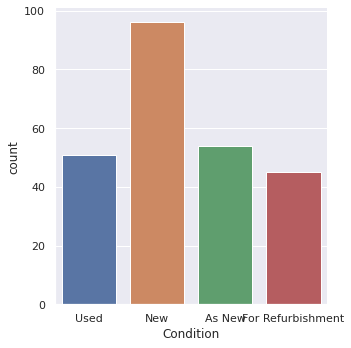

In [70]:
sn.set()
print(df['Condition'].value_counts())
sn.catplot(x="Condition", kind="count", data=df);

### 2.2 Number of Houses per Property Type:

In this plot, we can see we have much more homes compared to single habitation.

Homes                239
Single Habitation      7
Name: PropertyType, dtype: Int64


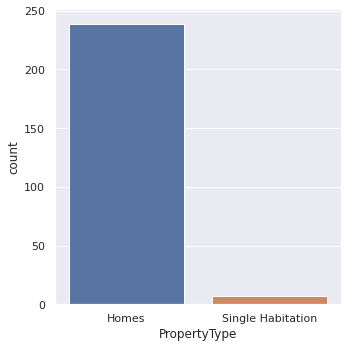

In [71]:
print(df['PropertyType'].value_counts())
sn.catplot(x="PropertyType", kind="count", data=df);

### 2.3 Number of Houses per Property Sub Type:

After we ploted the property sub type, we noticed that a vast majority of the houses are apartments.

Apartment             226
Duplex                  9
Townhouse Dwelling      4
Dwelling                2
Studio                  2
Isolated Villa          1
Penthouse               1
Apart Hotel             1
Name: PropertySubType, dtype: Int64


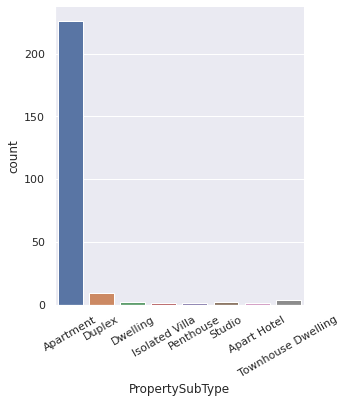

In [72]:
print(df['PropertySubType'].value_counts())
g = sn.catplot(x="PropertySubType", kind="count", data=df)
g.set_xticklabels(rotation=30)

### 2.4 Number of Houses per Parish:

As a result of the counts, we can see the parish of Marvila is the one that has more houses in our data set and parish like Areeiro and Beato have only 1 house. We can see that since the data set is small, we don´t see a very good distribution of houses per parish.

Marvila                    51
Campo de Ourique           23
Estrela                    17
Santa Maria Maior          17
Arroios                    16
Sao Vicente                14
Penha de Franca            12
Olivais                    11
Belem                      11
Alvalade                    8
Avenidas Novas              8
Parque das Nacoes           8
Santo Antonio               8
Lumiar                      7
Campolide                   6
Sao Domingos de Benfica     6
Benfica                     5
Ajuda                       5
Misericordia                4
Alcantara                   3
Santa Clara                 2
Carnide                     2
Areeiro                     1
Beato                       1
Name: Parish, dtype: Int64


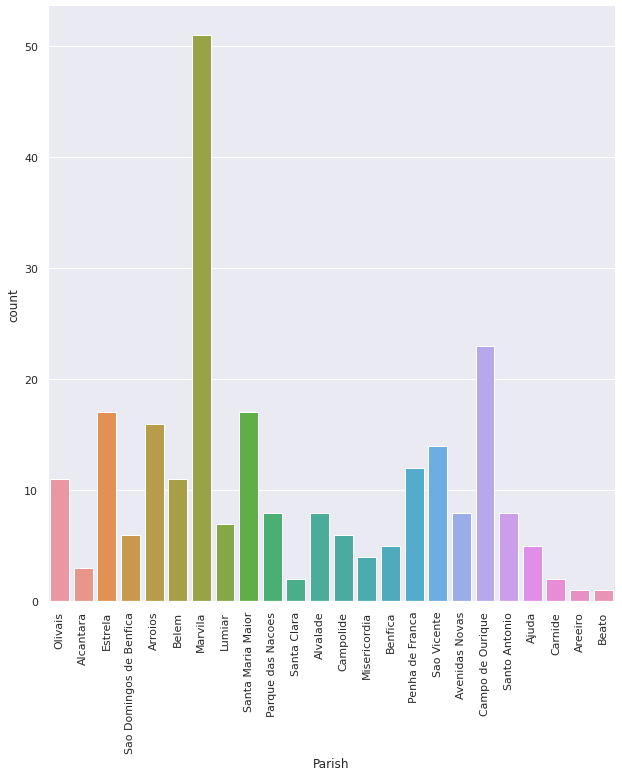

In [73]:
print(df['Parish'].value_counts())
g = sn.catplot(x="Parish", kind="count", data=df)
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(10,10)

### 2.5 Scatter Plots:

Here we have 3 scatter plot's of the differents attributes versus our target variable price. The first plot, we can see what we described previously about the greater amount of houses, with a price range from 85.000 to 4.3 million and single habitation goes around 400.000 to 1.8 million. Area net goes to a max of almost 600 m2 and the area gross goes to a max of almost 1200 m2. In this plots we can see 2 outliers, the one that has the biggest price and another with the biggest area.

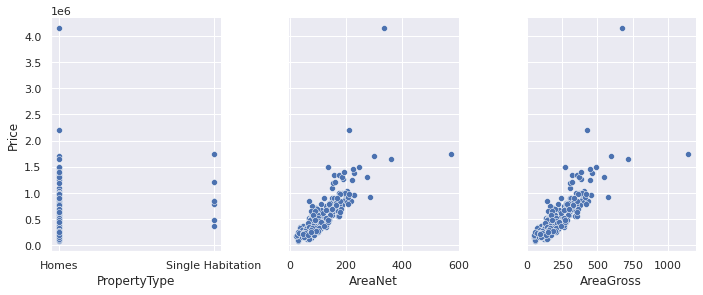

In [74]:
df_plot = df[["Price", "PropertyType", "AreaNet", 
                  "AreaGross"]]

g = sn.pairplot(data=df_plot, y_vars=['Price'], x_vars=df_plot.columns[1:4])
g.tight_layout()
g.fig.set_size_inches(10,5)

**Parish vs Price**

This scatter plot helped us to understand more about the relatinoship between price versus parish, were we can see a few parish stand out more than the others, like Santa Maria Maior wich has the highest price outlier, Avenidas novas wich has the minimum price house starting at half a million euros and Alvalade and Lumiar have high prices aswell.

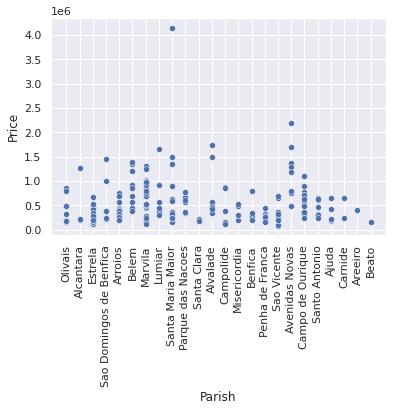

In [75]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Parish'], )
g.tick_params(axis='x', rotation=90)

**Property Sub Type vs Price**

As we have said previously, there are more apartments than the others sub type. One of the outlies belongs to duplex sub type and apartments have the biggest range of prices due to it's bigger quantity of data. Isolated Villa, Penthouse, Studio and Apart Hotel contains only one record.

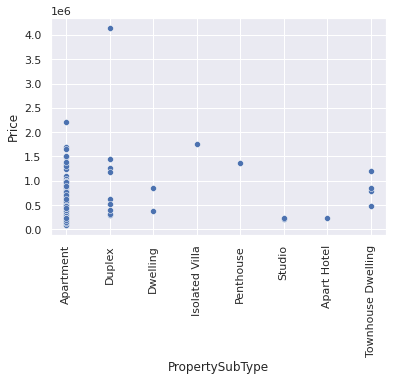

In [76]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['PropertySubType'], )
g.tick_params(axis='x', rotation=90)

**Bedrooms vs Price**

The outlier house contains 6 bedrooms, although we have houses with 7, 8 plus bedrooms with lower prices. We can see a slight correlation between the number of bedrooms and the prices, because the price tends to be higher with more bedrooms, with the exception of some outliers.

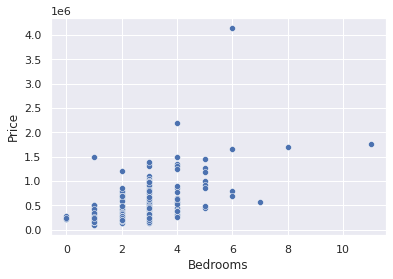

In [77]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Bedrooms'], )

**Bathrooms vs Price**

The outlier house has 5 bathrooms, although theres houses with the same amount of bathrooms with lower prices and there are 2 houses with 6 bathrooms with less than half of the price compared to the outlier one. We can see a slight correlation between the number of bathrooms and the prices, because the price tends to be higher with more bathrooms, with the exception of some outliers.

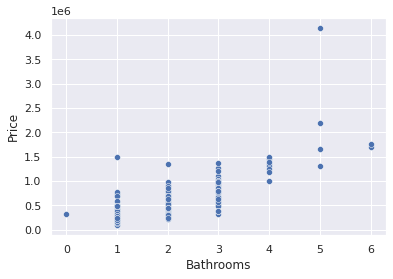

In [78]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Bathrooms'], )


**Condition vs Price**

The houses with condition new and as new are the ones with the higher prices, and the ones for refubishment have lower prices. There is not much correlation between price and condition that we can see from these graphs.

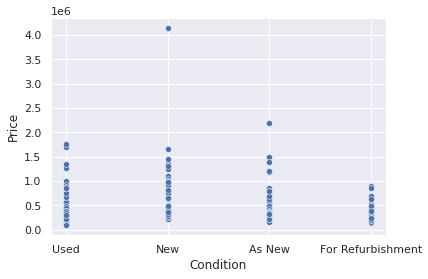

In [79]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Condition'] )

### 2.6 Distribution Plots:

To analyse the number of houses versus price and its distribution, we made a displot to see that the biggest amount of housed comes in a price range from 100.000 - 500.000 euros, and we can see a drop of number of houses as the price gets higher. The variable price doesn't present a normal distribution since the distribution is skewed to the left (positive).

Skewness: 3.310139


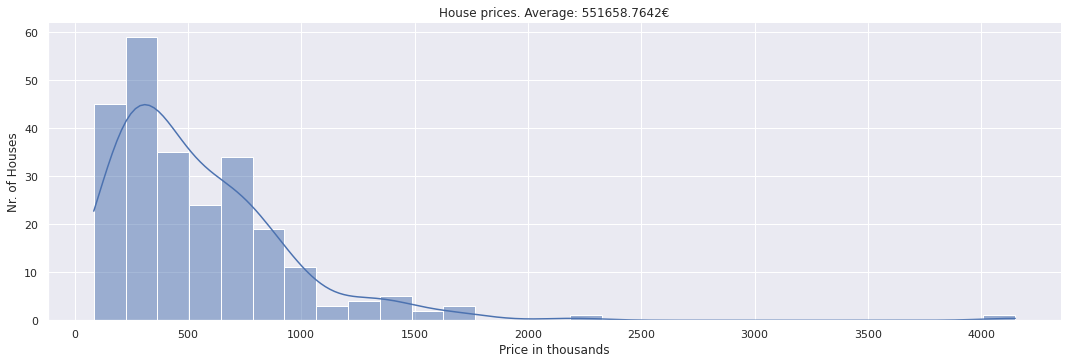

In [80]:
sn.displot(df['Price']/1e3, 
            aspect=3,
            kde=True)

plt.title(f'House prices. Average: {round(df.Price.mean(),4)}€')
plt.xlabel('Price in thousands')
plt.ylabel('Nr. of Houses')

print("Skewness: %f" % df['Price'].skew())


plt.show()

# 3. Visualizing the Data - OpenStreetMap

In this step we will create a 2D Lisbon map using the folium library in conjunction with OpenStreetMap API. Folium makes it easy to visualize data that’s been manipulated in Python. It enables both the binding of data to a map for visualizations.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.

This way we can clearly see hour data set houses throughout Lisbon, displaying them in the map and interacting with them.

### 3.1 Creating a new column with categorical values
We're adding a new column to our dataframe with categorical values based on the price of the houses in order to better visuzalise the data in the map. We considered the following prices:

* **Low Price** - a value lesser or equal than 200.000€
* **Below Average Price** - a value greater than 200.000€ and lesser than 400.000€
* **Average Price** - a value greater than 400.000€ and lesser than 600.000€
* **Above Average Price** - a value greater than 600.000€ and lesser than 1.000.000€
* **High Price** - a value greater or equal than 1.000.000€


In [81]:
def categorisePrices(row):
    if row['Price'] <= 2e5:
        return 'Low Price'
    elif row['Price'] > 2e5 and row['Price'] <= 4e5:
        return 'Below Average Price'
    elif row['Price'] > 4e5 and row['Price'] <=6e5:
        return 'Average Price'
    elif row['Price'] > 6e5 and row['Price'] < 1e6:
        return 'Above Average Price'
    elif row['Price'] >= 1e6:
        return 'High Price'
    
df['Price_Category'] = df.apply(lambda row: categorisePrices(row), axis=1)

df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Olivais,2463,198000,Low Price
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Alcantara,3125,1270000,High Price
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Estrela,4005,140000,Low Price
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.164,Sao Domingos de Benfica,3412,995000,Above Average Price
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Arroios,3277,570000,Average Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.746,-9.1769,Benfica,2727,196500,Low Price
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Santa Maria Maior,4807,245000,Below Average Price
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.7694,-9.1138,Olivais,2463,486000,Average Price
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.703,-9.2044,Belem,3542,375000,Below Average Price


### 3.2 Drawing the map
The markers on the map represent houses, and the colours correspond to:

* **green** - Low Price
* **yellow** - Below Average Price
* **blue** - Average Price
* **orange** - Above Average Price
* **red** - High price


In [82]:
from folium.plugins import FastMarkerCluster

loc_center = [df['Latitude'].mean(), df['Longitude'].mean()]

map1 = folium.Map(location = loc_center, tiles='Openstreetmap', zoom_start = 12.2, control_scale=True)

for index, loc in df.iterrows():
    
    if loc['Price_Category']=='Low Price':
        color = 'green'
    elif loc['Price_Category']=='Below Average Price':
        color = "yellow"
    elif loc['Price_Category']=='Average Price':
        color = 'blue'
    elif loc['Price_Category']=='Above Average Price' :
        color = 'orange'
    else:
        color = 'red'
    
    popup = ('Price: {}€\n Property Sub Type: {}\n Net Area: {} m²\n Category: {}'
                .format(loc['Price'], loc['PropertySubType'], loc['AreaNet'], loc['Price_Category']))
    
    folium.CircleMarker([loc['Latitude'], loc['Longitude']],
                        radius=5, weight=10, fill= False, popup=popup, color=color).add_to(map1)

FastMarkerCluster(data=list(zip(df['Latitude'].values, df['Longitude'].values))).add_to(map1) 
folium.LayerControl().add_to(map1)
map1

# 4. Some outliers

The highest price house in the dataset:

In [83]:
df.get(df.Price == df.Price.max())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
144,249,New,Homes,Duplex,6,5,336,672,0,38.7116,-9.1303,Santa Maria Maior,4807,4150000,High Price


The highest area net and area gross house in the data set:

In [84]:
df.get(df.AreaNet == df.AreaNet.max())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
50,151,Used,Single Habitation,Isolated Villa,11,6,573,1146,0,38.7497,-9.1347,Alvalade,3623,1750000,High Price


In [85]:
df.get(df.AreaGross == df.AreaGross.max())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
50,151,Used,Single Habitation,Isolated Villa,11,6,573,1146,0,38.7497,-9.1347,Alvalade,3623,1750000,High Price


The lowest price house in the dataset:

In [86]:
df.get(df.Price == df.Price.min())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category
37,138,Used,Homes,Apartment,1,1,29,58,0,38.7147,-9.1333,Sao Vicente,3402,85000,Low Price


Analysing the given features of each of these outliers we can conclude that although they stand out from the rest of the data these values can be real and legitimate so we're keeping them on the dataset.

# 5. Feature Engineering

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.

For this task we will see the correlation between the features and target variable price, correct some data types and select the features that we want for the prediction model.

In [87]:
df.dtypes

Id                   Int64
Condition           string
PropertyType        string
PropertySubType     string
Bedrooms             Int64
Bathrooms            Int64
AreaNet              Int64
AreaGross            Int64
Parking              Int64
Latitude           Float64
Longitude          Float64
Parish              string
Price M2             Int64
Price                Int64
Price_Category      object
dtype: object

### 5.1 Label Enconder
For encoding the categorical columns, we use LabelEncoder from sklearn.preprocessing- This way we create new numerical columns that represent the categorical features.

In [88]:
#encoding our important categorical columns...
from sklearn.preprocessing import LabelEncoder

categorical_cols = ('Condition', 'PropertyType', 'PropertySubType', 'Parish')

labelencoder = LabelEncoder()

for c in categorical_cols:
    df[c+'_index'] = labelencoder.fit_transform(df[c])
df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Category,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Olivais,2463,198000,Low Price,3,0,1,16
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Alcantara,3125,1270000,High Price,3,0,2,1
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Estrela,4005,140000,Low Price,3,0,1,12
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.164,Sao Domingos de Benfica,3412,995000,Above Average Price,3,0,1,22
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Arroios,3277,570000,Average Price,3,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.746,-9.1769,Benfica,2727,196500,Low Price,1,0,1,8
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Santa Maria Maior,4807,245000,Below Average Price,1,0,1,20
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.7694,-9.1138,Olivais,2463,486000,Average Price,1,1,7,16
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.703,-9.2044,Belem,3542,375000,Below Average Price,1,1,3,7


### 5.2 Correlation Matrix
The Pearson correlation method is the most common method to use for numerical variables; it assigns a value between − 1 and 1, where 0 is no correlation, 1 is total positive correlation, and − 1 is total negative correlation. This is interpreted as follows: a correlation value of 0.7 between two variables would indicate that a significant and positive relationship exists between the two. A positive correlation signifies that if variable A goes up, then B will also go up, whereas if the value of the correlation is negative, then if A increases, B decreases.

In [89]:
corr= df.corr(method='pearson')
corr.style.background_gradient(cmap='Reds', axis=0)

,Id,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Price M2,Price,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
Id,1.000000,0.014329,-0.020329,-0.061726,-0.061726,-0.219868,-0.044284,-0.010148,0.052801,-0.054303,-0.822686,0.125461,0.126328,0.007896
Bedrooms,0.014329,1.000000,0.672071,0.771292,0.771292,-0.111847,0.224300,-0.052104,-0.037470,0.541830,0.052188,0.263288,0.115980,-0.204767
Bathrooms,-0.020329,0.672071,1.000000,0.781154,0.781154,0.038160,0.154104,-0.068226,-0.011177,0.746716,-0.029170,0.191400,0.157038,-0.150446
AreaNet,-0.061726,0.771292,0.781154,1.000000,1.000000,-0.102283,0.277058,0.117813,-0.161325,0.798370,0.086044,0.238234,0.153355,-0.165127
AreaGross,-0.061726,0.771292,0.781154,1.000000,1.000000,-0.102283,0.277058,0.117813,-0.161325,0.798370,0.086044,0.238234,0.153355,-0.165127
Parking,-0.219868,-0.111847,0.038160,-0.102283,-0.102283,1.000000,-0.180040,-0.230680,0.147430,0.059220,0.106267,-0.052604,-0.069155,-0.177718
Latitude,-0.044284,0.224300,0.154104,0.277058,0.277058,-0.180040,1.000000,0.492685,-0.511346,0.054091,0.056566,0.039920,-0.031675,0.129109
Longitude,-0.010148,-0.052104,-0.068226,0.117813,0.117813,-0.230680,0.492685,1.000000,-0.217179,0.055152,0.107681,-0.141545,-0.112772,0.404130
Price M2,0.052801,-0.037470,-0.011177,-0.161325,-0.161325,0.147430,-0.511346,-0.217179,1.000000,0.039089,-0.117450,-0.103316,-0.073644,0.194951
Price,-0.054303,0.541830,0.746716,0.798370,0.798370,0.059220,0.054091,0.055152,0.039089,1.000000,0.028215,0.141583,0.162352,-0.104070


### 5.3 Correlation HeatMap

From the correlation matrix, we can build a heat map to better visualise the correlation between features.
The ones that have better correlationm with the target variable, are the ones that are close to -1.00 or 1.00. We can see that these features are Number of Bedrooms and Bathrooms, Area net and Area Gross. Parish and Property type and sub type, show less correlation and the remaining tend to 0.

<AxesSubplot:>

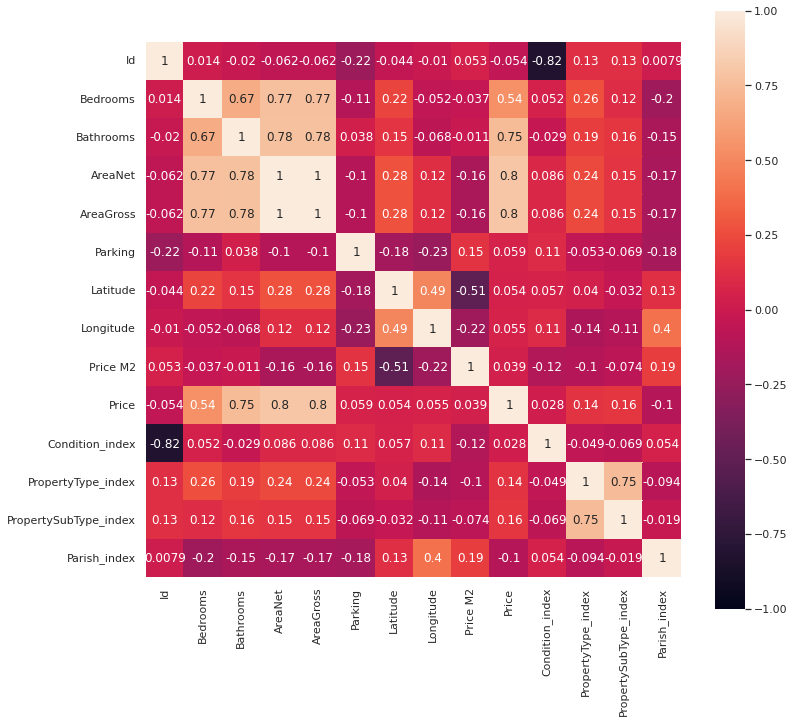

In [105]:
f, ax = plt.subplots(figsize=(12,11))
sn.heatmap(corr,square=True, vmax=1, vmin=-1, annot=True)

### 5.4 Feature selection

Although Parking, Latitue/Longitude and condition don't seem to have a great pearson correlation with the target variable, after some experimentation, we decided that we should keep those as features anyway as it improves the prediction model quality and proved to have some impact.

In [91]:
X = df[['Bedrooms', 'Bathrooms', 'AreaNet', 'AreaGross', 'Parking', 'Latitude','Longitude', 'Condition_index', 'PropertyType_index',
        'PropertySubType_index', 'Parish_index']]
Y = df[['Price']]


# 6. Creating a Prediction Model

In this section we can finally create the prediction model, using Random Forest Regression.

First we need to split the data set, 80% of the data set was used for training the model and 20% for testing.

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [93]:
X_train

,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
110,1,1,79,158,0,38.7458,-9.0978,2,0,1,14
15,4,2,137,274,0,38.7463,-9.1439,3,0,1,2
144,6,5,336,672,0,38.7116,-9.1303,2,0,2,20
7,3,1,81,162,0,38.7561,-9.1796,3,0,1,22
205,6,2,150,300,0,38.7262,-9.135,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
67,1,1,50,100,0,38.7176,-9.1527,2,0,1,21
192,3,3,120,240,0,38.7624,-9.0983,0,0,2,17
117,2,1,139,278,0,38.7458,-9.0978,2,0,1,14
47,3,1,105,210,0,38.7491,-9.142,3,0,1,2


### 6.1 Feature Scaling

The dataset is not yet a scaled. For example the values for number of bedrooms are very different to the values from the area net. It would be beneficial to scale our data. To do so, we will use Scikit-Learn's StandardScaler class:

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
#show the scaled features
df_train = pd.DataFrame(X_train, columns = ['Bedrooms', 'Bathrooms', 'AreaNet', 'AreaGross','Parking', 'Latitude', 
                                            'Longitude', 'Condition_index', 'PropertyType_index',
                                            'PropertySubType_index', 'Parish_index'])
df_train

,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Condition_index,PropertyType_index,PropertySubType_index,Parish_index
0,-1.135069,-0.809040,-0.476051,-0.476051,-0.304855,0.580571,1.329126,0.372370,-0.161796,-0.211298,0.168516
1,1.053195,0.134840,0.401625,0.401625,-0.304855,0.604467,-0.135030,1.332693,-0.161796,-0.211298,-1.853674
2,2.512038,2.966479,3.412961,3.412961,-0.304855,-1.053903,0.296911,0.372370,-0.161796,1.006775,1.179610
3,0.323774,-0.809040,-0.445786,-0.445786,-0.304855,1.072825,-1.268878,1.332693,-0.161796,-0.211298,1.516642
4,2.512038,0.134840,0.598345,0.598345,-0.304855,-0.356145,0.147637,-0.587953,-0.161796,-0.211298,-1.516642
...,...,...,...,...,...,...,...,...,...,...,...
191,-1.135069,-0.809040,-0.914889,-0.914889,-0.304855,-0.767153,-0.414522,0.372370,-0.161796,-0.211298,1.348126
192,0.323774,1.078720,0.144375,0.144375,-0.304855,1.373912,1.313245,-1.548276,-0.161796,1.006775,0.674063
193,-0.405648,-0.809040,0.431889,0.431889,-0.304855,0.580571,1.329126,0.372370,-0.161796,-0.211298,0.168516
194,0.323774,-0.809040,-0.082610,-0.082610,-0.304855,0.738283,-0.074686,1.332693,-0.161796,-0.211298,-1.853674


### 6.2 Prediction model and results

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve our problem:

In [96]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0, max_features=None)
regressor.fit(X_train, Y_train)

/tmp/ipykernel_13743/2584206897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


RandomForestRegressor(max_features=None, n_estimators=200, random_state=0)

In [97]:
Y_pred = regressor.predict(X_test)

Listing our price predictions:

In [98]:
df_predictions = pd.DataFrame(Y_test, columns = ['Price'])
df_predictions['Prediction'] = Y_pred.tolist()
df_predictions

,Price,Prediction
89,810000,7.576420e+05
108,500000,4.810579e+05
74,598000,6.102300e+05
109,500000,4.810579e+05
71,365000,3.597900e+05
126,220000,3.351050e+05
104,920000,9.196898e+05
138,650000,7.788061e+05
154,400000,4.397600e+05
199,790000,1.080802e+06


### 6.3 Evaluating Results

After the predictions, we can use some evaluating metrics to evaluate the quality of the prediction model:

**Mean Absolute Error (MAE)**
The MAE is simply defined as the sum of all the distances/residual (the difference between the actual and predicted value) divided by the total number of points in the dataset. It is the absolute average distance of our model prediction.

**Root Mean Squared Error (RMSE)**
Another commonly used metric is the root mean squared error, which is the square root of the average squared distance (difference between actual and predicted value). RMSE is defined as the square root of all the squares of the distance divided by the total number of points.

**Mean Squared Error (MSE)**
It is the average of the squared differences between the actual and the predicted values. Lower the value, the better the regression model.


**R2 Score**
The R2 score is a statistical measure that tells us how well our model is making all its predictions on a scale of zero to one. It's not ideal for a model to predict the actual values in a regression problem . But we can use the R2 score to determine the accuracy of our model in terms of distance or residual.

In [99]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score', metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error: 103974.80079780218
Mean Squared Error: 41764886155.337135
Root Mean Squared Error: 204364.59124647093
R2 Score 0.6297208421979152


We can see the MAE is around 103974€, this value and the rest of the other error values are quite high, wich means the model is not very accurate. Although these values are high, since the prices of the houses vary between very high values aswell, our prediction results are not very far from the real values. 

The R2 score is 0.6297 wich is a decent score, since the closest to 1 the R2, the better the regression model is.

### 6.4 Visualizing the Predictions

We created a categorical column to categorise the quality of the prediction in order to visualise them better.

We considered the followed categories:

* **Good Prediction** - The error is lesser or equal than half of MAE
* **Average Prediction** - The error is greater or equal than half of MAE and the error is lesser or equal than one and half of MAE
* **Bad Prediction** - The error is greater than one and a half of MAE

In [100]:
def categorisePredictions(row):
    error = abs(row['Price'] - row['Prediction'])
    MAE = metrics.mean_absolute_error(Y_test, Y_pred)
    if error <= MAE*0.5:
        return 'Good Prediction'
    elif error >= MAE*0.5 and error <= MAE*1.5:
        return 'Average Prediction'
    else:
        return 'Bad prediction'
    
df_predictions['Prediction_Category'] = df_predictions.apply(lambda row: categorisePredictions(row), axis=1)

In [101]:
df_predictions

,Price,Prediction,Prediction_Category
89,810000,7.576420e+05,Average Prediction
108,500000,4.810579e+05,Good Prediction
74,598000,6.102300e+05,Good Prediction
109,500000,4.810579e+05,Good Prediction
71,365000,3.597900e+05,Good Prediction
126,220000,3.351050e+05,Average Prediction
104,920000,9.196898e+05,Good Prediction
138,650000,7.788061e+05,Average Prediction
154,400000,4.397600e+05,Good Prediction
199,790000,1.080802e+06,Bad prediction


In this graph we can visualise the quality of the prediction based on the prediction category.

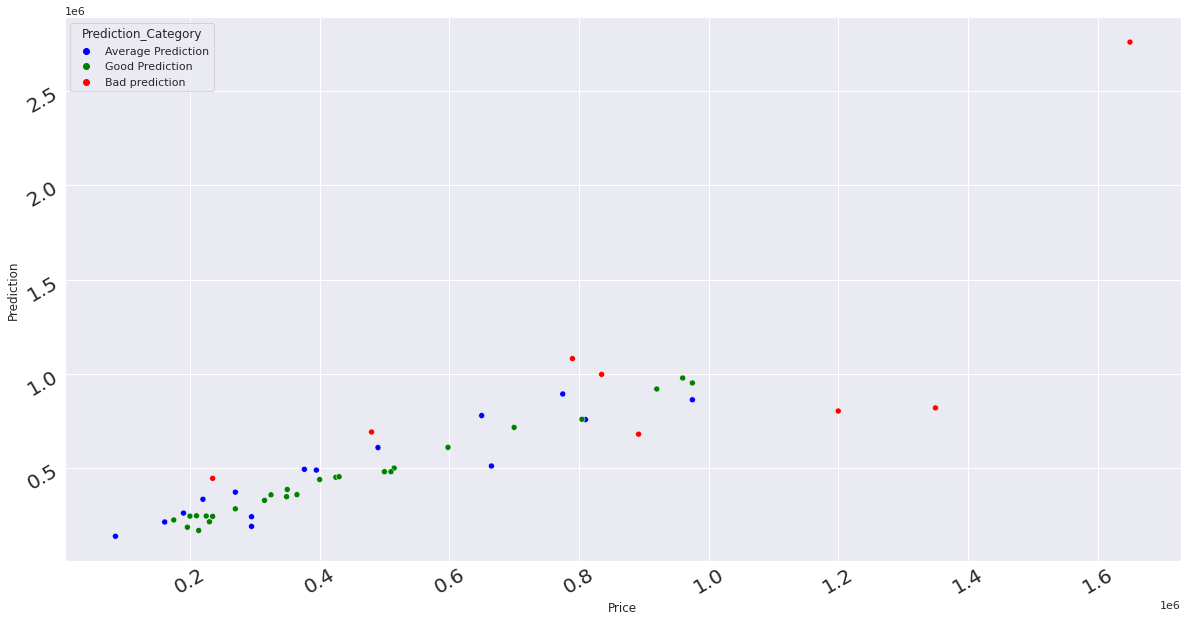

In [104]:
# set the dimensions for the scatterplot
fig, ax = plt.subplots(figsize=(20,10))
sn.scatterplot(hue="Prediction_Category", y="Prediction", x="Price", data=df_predictions)
sn.set_palette(["blue","red","green",])

# plot formatting 
ax.tick_params(axis="x", rotation=30, labelsize=20, length=0)
ax.tick_params(axis="y", rotation=30, labelsize=20, length=0)

# 7. Thoughts and Conclusions

With this work we concluded that the price prediction wasn't very far since our error was around 100.000 euros. This may be justified by the big descrepancy in houses prices and keeping the outliers. Another reason for this is that we don't have that many features in our data and this prices can be quite subjective. Finally, our dataset is very small with only 246 entries, and using only 196 of these to train our model, hence with such a small sample it is hard to have a very accurate model. The R2 value wasn´t the most ideal, although it was greater than 0.60 wich means it tends to 1, being decent. These values were expected since we kept the big priced houses and it´s noticeable in the skewness graph, were we can see a bump in the end that raises the average house price. 

As final considerations, we could have better results if we had reduced the number of houses that have their prices in a range of 100.000 and 500.000 euros for example, because the average house price would be lower and errors would be lower too, the skewness of the graph would be closer to 0.